## Types Of Transformations
1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling to Median And Quantiles
4. Guassian Distribution
   - Logarithmic Transformation 
   - Reciprocal Transformation
   - Squareroot Transformation
   - Exponential Transformation
   - Box Cox Transformation

### Standardization

In this we try to bring all the Features or Variables to a similar scale. standardization means centering the variables to zero.

Standardization: z = x−μ/σ

- 'z' represents the standardized value.
- 'x' is the original value.
- 'μ' (mu) is the mean of the feature.
- 'σ' (sigma) is the standard deviation of the feature.

So, the key difference is that standardization is a general process of scaling data, whereas the z-score is a specific result of standardization that standardizes the data to have a mean of 0 and a standard deviation of 1.

In [45]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols =['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [46]:
df.isnull().any()

Survived    False
Pclass      False
Age          True
Fare        False
dtype: bool

In [47]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [48]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [49]:
#### standardization: We use StandardScaler from Sklearn library
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
## fit vs fit_transform
##fit is applied in ml algorithms just to fit for train data
##fit_transform is used when we apply algorithm and change the data 
df_scaled=scaler.fit_transform(df)
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [51]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


We can see here that the standardization perform on every single feature or variable.
first it find the mean of that particular feature and then standard deviation.next perform for each variable

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <BarContainer object of 20 artists>)

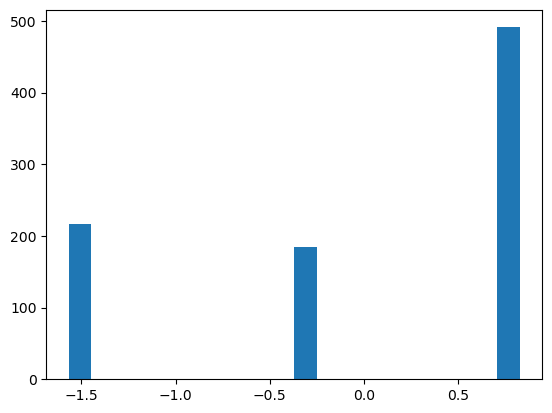

In [53]:
plt.hist(df_scaled[:,1],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

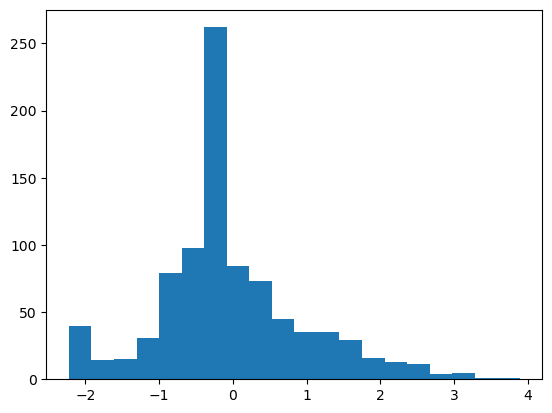

In [54]:
plt.hist(df_scaled[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

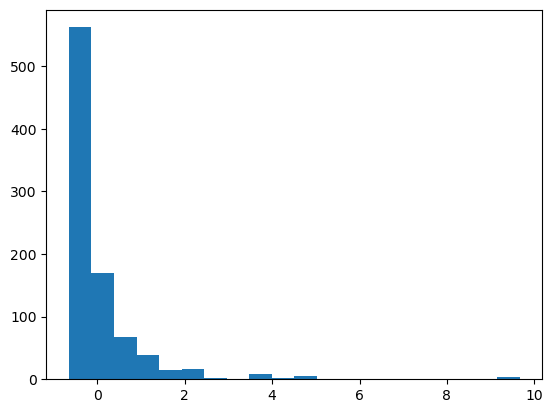

In [55]:
plt.hist(df_scaled[:,3],bins=20)

## Min Max Scaling
##we use mostly for deep leartning techniques like cnn..

Min Max Scaling scales the values between 0 to 1

The Min-Max Scaler is a data preprocessing technique used to scale the features of a dataset to a specific range, typically between 0 and 1. It's a linear transformation method that maps the minimum value of each feature to 0 and the maximum value to 1, with values in between scaled accordingly. 

Min-Max Scaling: x_scaled = x-x_min/(x_max-x_min)

- 'x_scaled' is the scaled value.
- 'x' is the original value.
- 'x_min' is the minimum value of the feature.
- 'x_max' is the maximum value of the feature.

In [56]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
        2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <BarContainer object of 20 artists>)

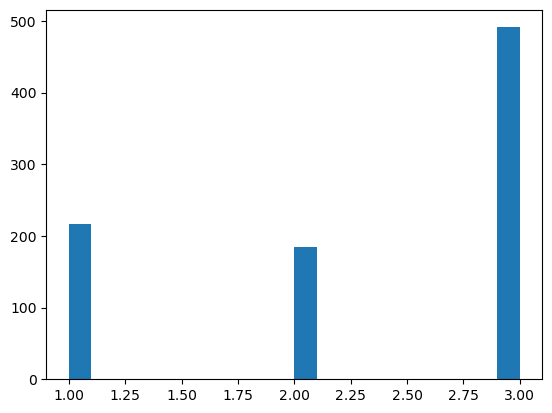

In [57]:
plt.hist(df['Pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

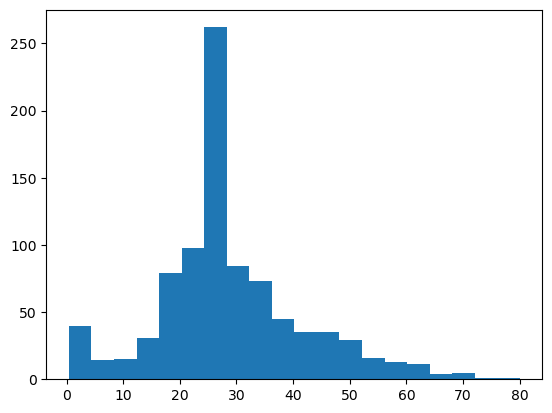

In [58]:
plt.hist(df['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

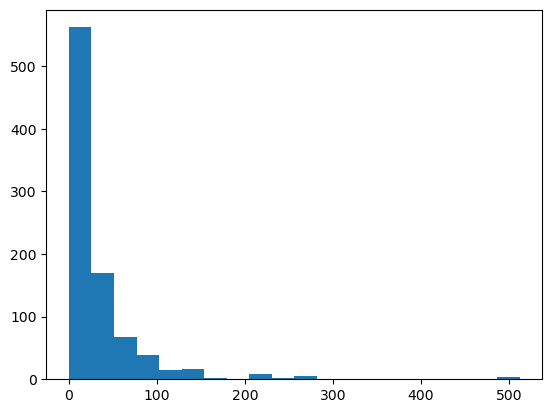

In [59]:
plt.hist(df['Fare'],bins=20)

## Robust Scaler

It is used to scale the feature to Median And Quantiles

The key idea behind RobustScaler is to scale the data in a way that is robust to outliers by using the median and the interquartile range (IQR).

RobustScaler: x_scaled = (x-median)/IQR 

- 'x_scaled' is the scaled value.
- 'x' is the original value.
- 'median' is the median of the feature.
- 'IQR' is the interquartile range, which is the difference between the 75th percentile (Q3) and the 25th       percentile (Q1) of the feature.


In [60]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
        -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <BarContainer object of 20 artists>)

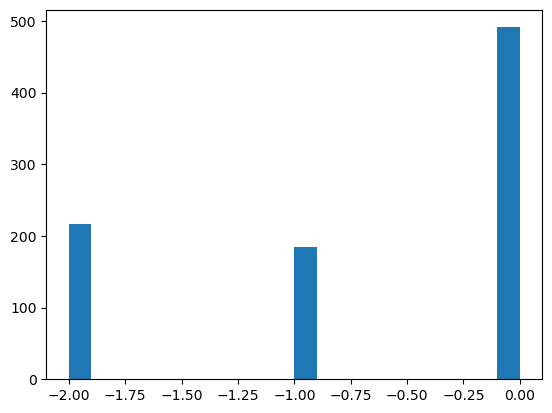

In [61]:
plt.hist(df_robust_scaler['Pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

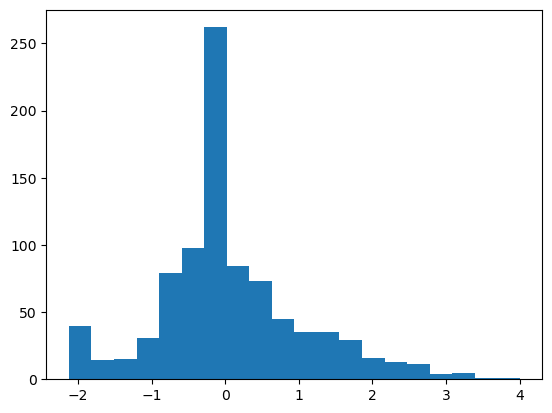

In [62]:
plt.hist(df_robust_scaler['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

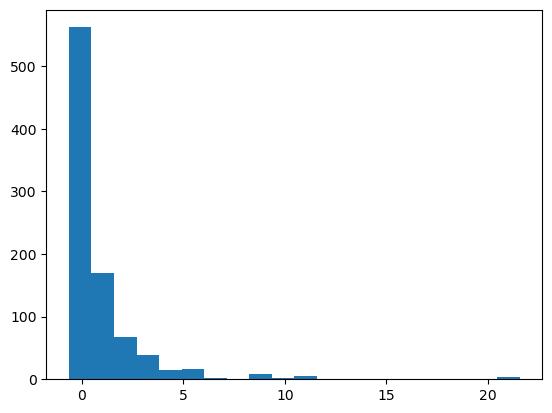

In [63]:
plt.hist(df_robust_scaler['Fare'],bins=20)

## 4. Guassian Distribution
##some machine learning algorithms like linear logistic assume that features are normally distributed.it increases performance and accuracy.
   - Logarithmic Transformation 
   - Reciprocal Transformation
   - Squareroot Transformation
   - Exponential Transformation
   - Box Cox Transformation

In [81]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [82]:
df['Age']=df['Age'].fillna(df.Age.median())

In [83]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stat
import pylab

In [85]:
## If you want check the data weather feature is gaussian distributed or normal distribution 
#### Q-Q plot

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()      

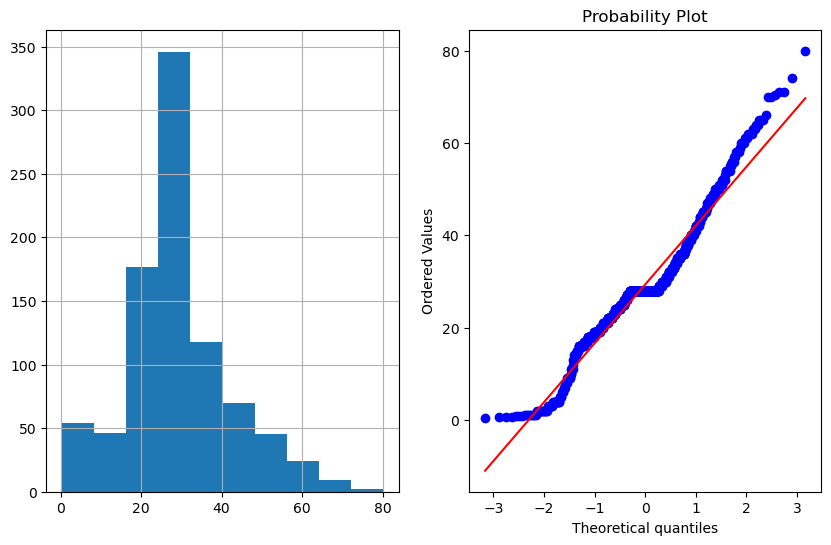

In [86]:
plot_data(df,'Age')

### Logarithmic Transformation

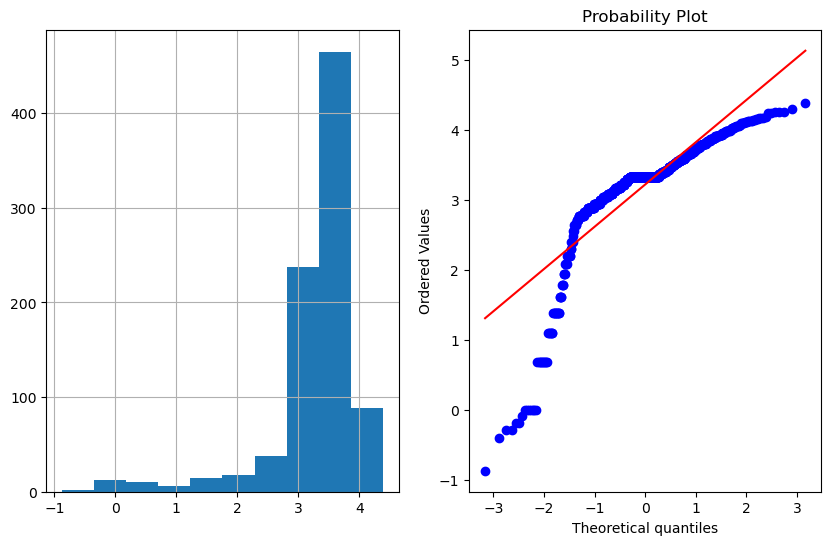

In [89]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

### Reciprocal Transformation

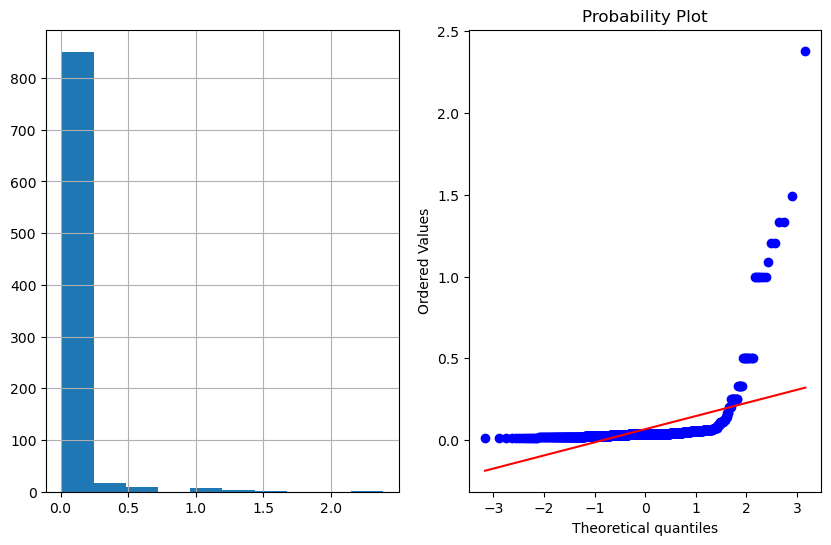

In [92]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

### Squareroot Transformation

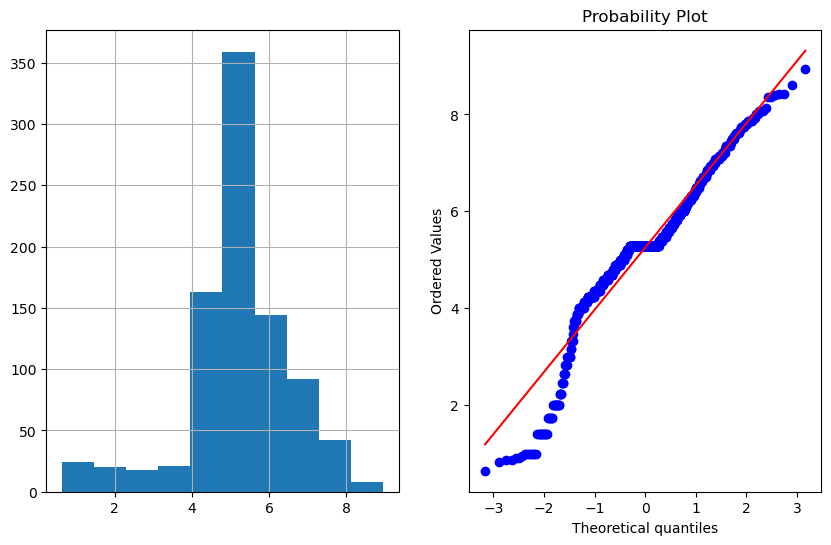

In [93]:
df['Age_square']=df.Age**(1/2)
plot_data(df,'Age_square')

### Exponential Transformation 

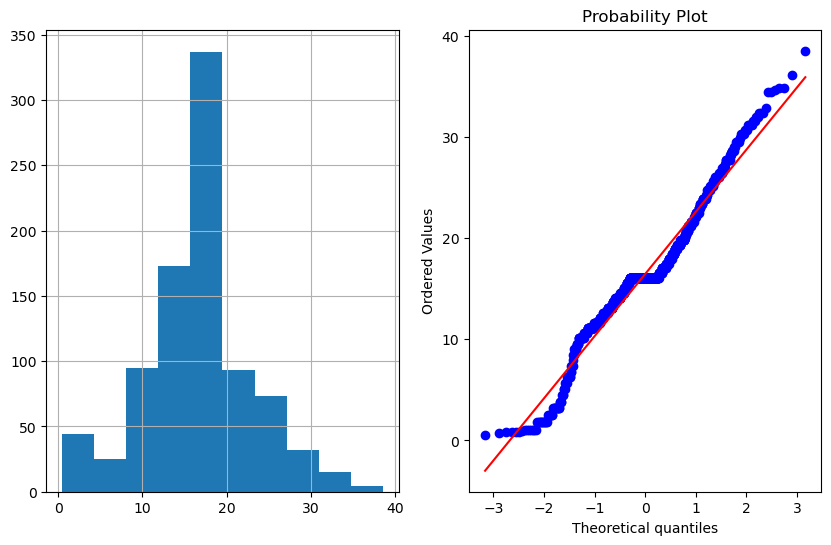

In [94]:
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

### Box COx Transformation

The Box-Cox transformation is defined as:

T(Y) = (Y exp(λ)-1)/λ

Where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given is selected

In [95]:
stat.boxcox(df['Age'])

(array([13.468119  , 21.4987284 , 15.56341683, 20.05611014, 20.05611014,
        16.58601436, 28.84746463,  0.92513402, 16.07664335,  9.01695462,
         2.53193075, 30.6104327 , 12.39181078, 21.97437834,  9.01695462,
        29.29062758,  0.92513402, 16.58601436, 18.09258499, 16.58601436,
        20.05611014, 19.56971919,  9.59722218, 16.58601436,  5.32265694,
        21.4987284 , 16.58601436, 11.84551333, 16.58601436, 16.58601436,
        22.44755196, 16.58601436, 16.58601436, 34.06447944, 16.58601436,
        23.38676361, 16.58601436, 12.93257404, 11.29332892,  9.01695462,
        22.44755196, 16.07664335, 16.58601436,  1.75636071, 11.84551333,
        16.58601436, 16.58601436, 16.58601436, 16.58601436, 11.29332892,
         4.65897047, 12.93257404, 26.60575762, 17.09169505, 33.6375945 ,
        16.58601436, 12.93257404, 16.83930618,  3.26857952,  7.221786  ,
        13.468119  , 21.4987284 , 24.77874367,  2.53193075, 16.58601436,
        16.58601436, 17.09169505, 11.84551333, 10.7

In [96]:
df['Age_BoxCOx'],parameters=stat.boxcox(df['Age'])

In [97]:
print(parameters)

0.7964531473656952


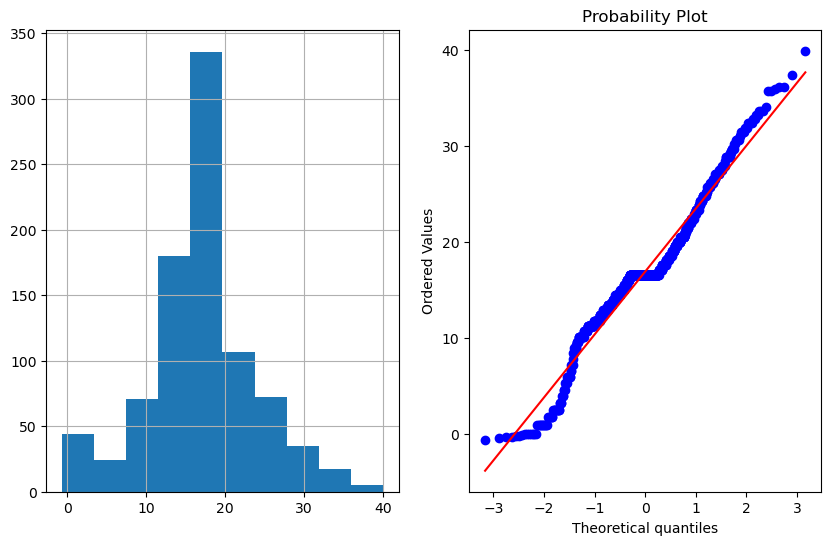

In [98]:
plot_data(df,'Age_BoxCOx')

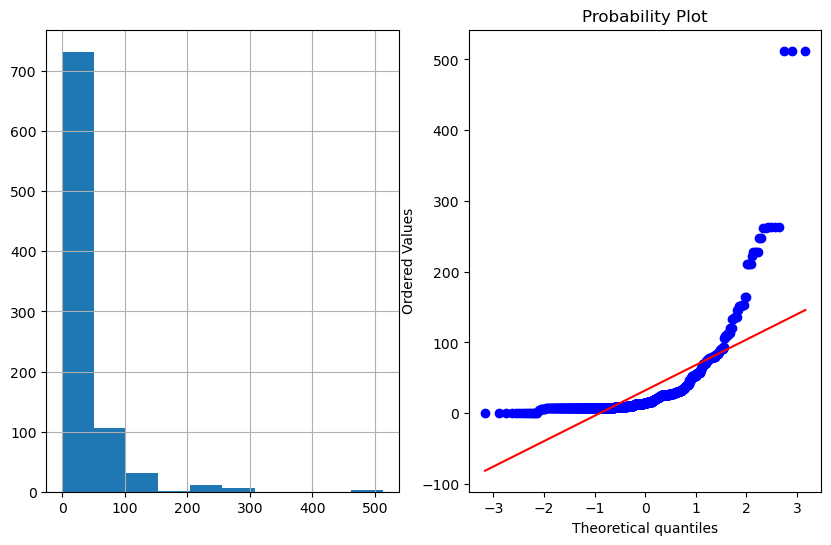

In [99]:
plot_data(df,'Fare')

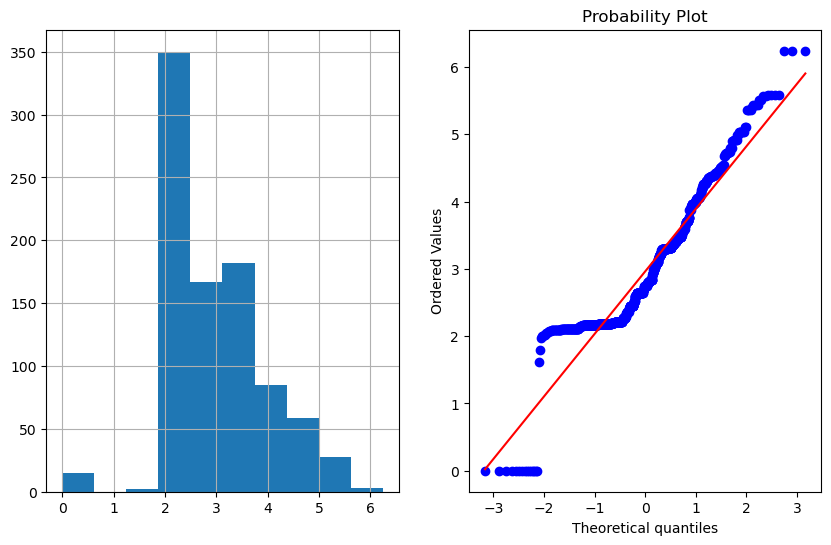

In [102]:
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')

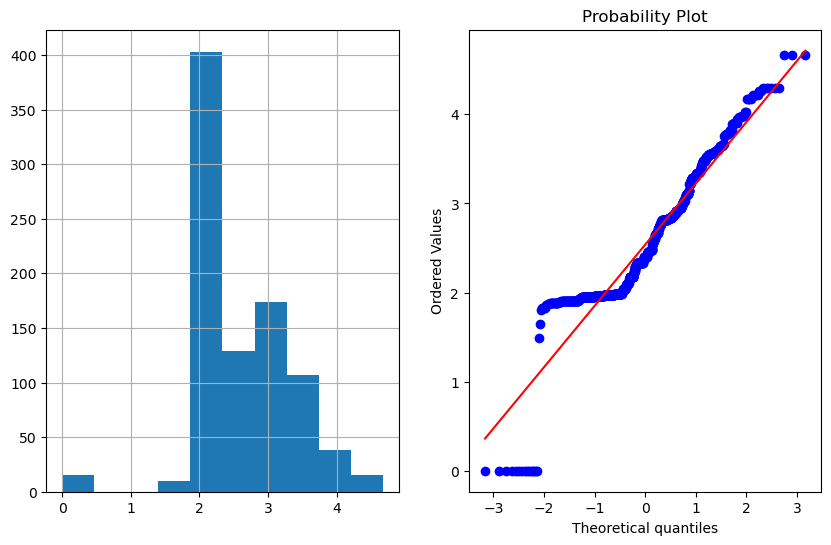

In [104]:
df['Fare_BoxCox'],parameters=stat.boxcox(df['Fare']+1)
plot_data(df,'Fare_BoxCox')

In [105]:
print(parameters)

-0.09778702818680361


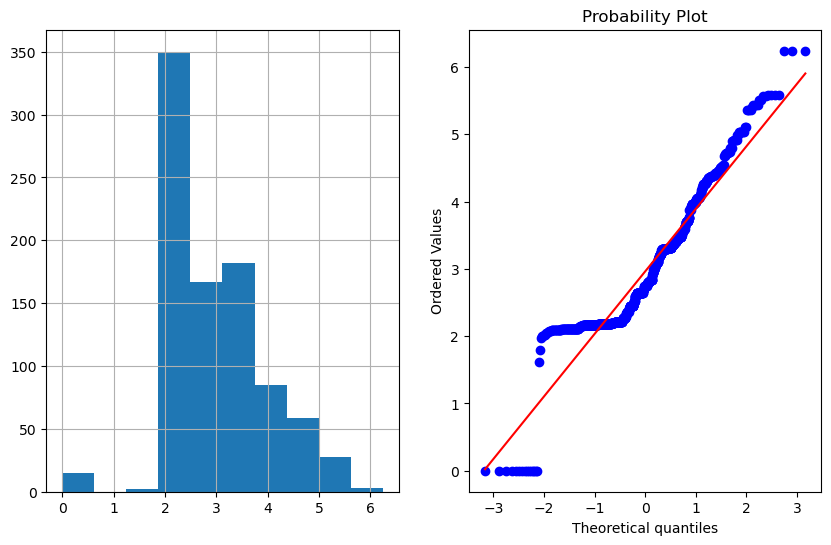

In [106]:
df['Fare_log']=np.log(df['Fare']+1)
plot_data(df,'Fare_log')

Which Should be done first Standardization or Transformation?

First check data is normal distributed or not. If data is normal distributed then go with standardization or else Transformation